# Proyecto Módulo 2


## Nombre: Mariana López , Diego Orozco


### 1.1 SIMULACIÓN DE EMPRESA COMERCIALIZADORA DE GRANOS 
Este trabajo es una simulación de los procesos que se llevan a cabo en una empresa agrícola con el fin de poder hacer algunas predicciones o recomendaciones a la empresa en cuanto a la producción de esta, así como a la optimización de sus recursos. 


### 1.2 Objetivos.

> #### 1.1 Objetivo general.

Determinar la ganacia neta por concepto de venta de maiz de la empresa agricola 

> #### 1.2 Objetivos específicos

-   Simular la produccion de la empresa, usando los previos conocimientos que se tiene tanto del tiempo como del costo de todo el proceso 
-	Determinar un posible precio del producto considerando el mercado y como se relaciona con el      


### 1.3 Definición del problema.
> La empresa agrícola, Multiservicios Agrícolas De Comundú, S.A. de C.V. se dedica a la comercialización de granos a nivel nacional e internacional. Uno de los granos que mas se comercializa es el Maiz, y la empresa cuanta con clientes fijos los cuales le piden un determinado numero de toneladas al semestre. 

### 1.4 Nodos y variables que se decidieron simular y porqué


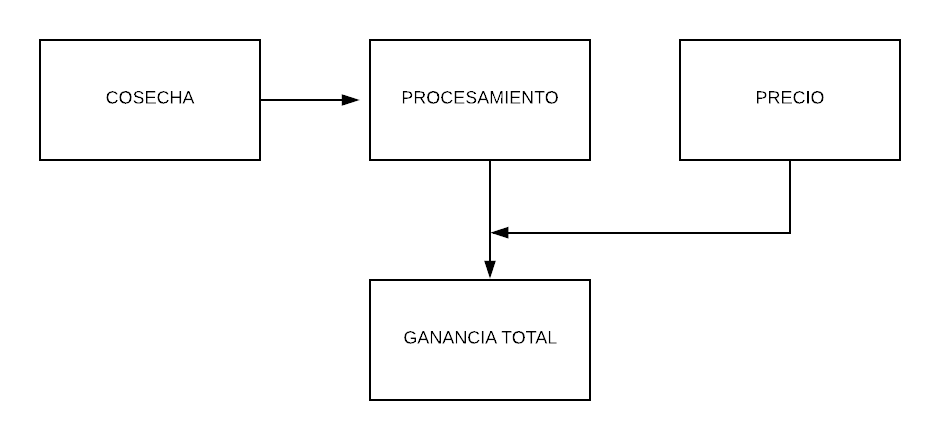

**Cosecha** 

- Preparación.      
- Siembra.
- Labores Culturales.
- Mantenimiento.
 

**Procesamiento**
- Limpieza de granos.
- Encostalado.

**Precio**
- Bases de datos. 
    - Precios historicos. 
    - Forwards del maíz.
    - Dolar-peso. 
- Simulación montecarlo para calcular posibles precios 

**Ganancia Total**
- Gastos totales 
- Ingresos totales

### 1.5 Definición de hipótesis y supuestos.


- SUPUESTOS:
    - Los tiempos medios y costos usados en los nodos 1 y 2, siguen una distribucion triangular, se tiene el valor minimo y el maximo dado por la empresa de acuerdo a sus experiencias. 
    - En el nodo 1, los datos estan dados por Hectarea y en el nodo 2 los datos estan dados por Tonelada 


### 1.6 Obtención de bases de datos.


### 1.7 Visualización de resultados de simulación.

In [103]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.neighbors import KernelDensity
import datetime
from datetime import datetime, timedelta
import scipy.stats as st
import scipy as sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import vonmises
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

#### NODO 1
Se separo en 4 subnodos para poder simularlo de una manera mas explicita. 
En este nodo se simula todo el proceso de siembra y cosecha del maíz. Como se menciono antes, este nodo es por hectarea. 

In [104]:
confianza = 0.95

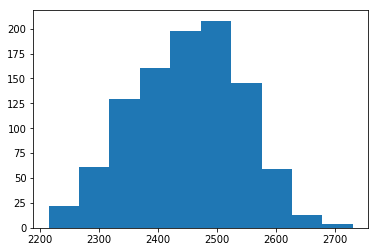

El costo promedio en la etapa de preparación es:  2449.3855351861257
Con una confianza de 0.95 la media estará en el intervalo normal,
 (2443.729078333793, 2455.0419920384584)


In [105]:
barbecho=np.random.triangular(768,900,936,1000)
surqueo=np.random.triangular(280,300,310,1000)
rastreo=np.random.triangular(750,1000,1100,1000)
floteo=np.random.triangular(286,300,432,1000)
c_prep= list(map(lambda a,b,c,d:a+b+c+d,barbecho,surqueo,rastreo,floteo))
plt.hist(c_prep)
plt.show()
print("El costo promedio en la etapa de preparación es: ", np.mean(c_prep))
i2 = st.norm.interval(confianza, loc=np.mean(c_prep), scale=st.sem(c_prep))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))

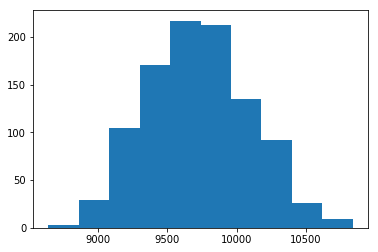

El costo promedio en la etapa de siembra es:  9724.506131582551
Con una confianza de 0.95 la media estará en el intervalo normal,
 (9701.411833744392, 9747.60042942071)


In [106]:
semillas=np.random.triangular(4820,5440,6000,1000)
fertilizantes=np.random.triangular(2856,3270,3524,1000)
#El proceso de sembrar depende del tiempo que se dure sembrando, ya que se paga por día a los trabajdores, por eso multiplicamos dos listas
sembrar=np.random.triangular(3,5,9,1000)*np.random.triangular(150,200,225,1000)
c_siembra= list(map(lambda a,b,c:a+b+c,semillas,sembrar,fertilizantes))
plt.hist(c_siembra)
plt.show()
print("El costo promedio en la etapa de siembra es: ", np.mean(c_siembra))
i2 = st.norm.interval(confianza, loc=np.mean(c_siembra), scale=st.sem(c_siembra))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))

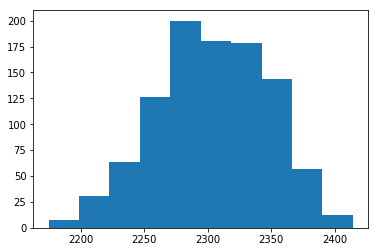

El costo promedio en la etapa de labores cultrales:  2303.3623299630813
Con una confianza de 0.95 la media estará en el intervalo normal,
 (2300.642319616239, 2306.0823403099234)


In [107]:
cinceleo=np.random.triangular(262,300,321,1000)
fertilizacion=np.random.triangular(1624,1750,1809,1000)
resurqueo=np.random.triangular(228,300,315,1000)
c_labc= list(map(lambda a,b,c:a+b+c,cinceleo,fertilizacion,resurqueo))
plt.hist(c_labc)
plt.show()
print("El costo promedio en la etapa de labores cultrales: ", np.mean(c_labc))
i2 = st.norm.interval(confianza, loc=np.mean(c_labc), scale=st.sem(c_labc))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))

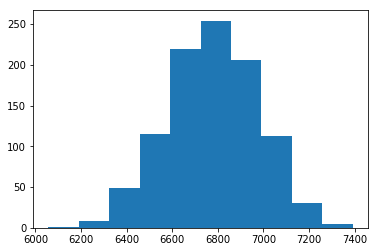

El costo promedio en la etapa de mantenimiento:  6778.097441187305
Con una confianza de 0.95 la media estará en el intervalo normal,
 (6765.729247495367, 6790.465634879242)


In [108]:
luz=np.random.triangular(289,600,895,1000)
agua=np.random.triangular(125,300,412,1000)
#El fertilizante se usa dos veces durante el riego, por lo cual sumaremos 2 listas
fertilizanter=np.random.triangular(1248,1400,1541,1000)+np.random.triangular(1248,1400,1541,1000)
mej=np.random.triangular(423,600,714,1000)
cplag=np.random.triangular(2300,2500,2800,1000)
c_mant= list(map(lambda a,b,c,d,e:a+b+c+d+e,luz,fertilizanter,mej,cplag,agua))
plt.hist(c_mant)
plt.show()
print("El costo promedio en la etapa de mantenimiento: ", np.mean(c_mant))
i2 = st.norm.interval(confianza, loc=np.mean(c_mant), scale=st.sem(c_mant))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))

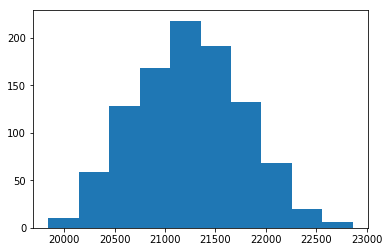

El costo promedio de todo el proceso es:  21238.96585484481
Con una confianza de 0.95 la media estará en el intervalo normal,
 (21206.027207478288, 21271.90450221133)


In [109]:
prep=np.random.triangular(min(c_prep),np.mean(c_prep),max(c_prep),1000)
siembra=np.random.triangular(min(c_siembra),np.mean(c_siembra),max(c_siembra),1000)
labc=np.random.triangular(min(c_labc),np.mean(c_labc),max(c_labc),1000)
mant=np.random.triangular(min(c_mant),np.mean(c_mant),max(c_mant),1000)
c_proc= list(map(lambda a,b,c,d:a+b+c+d,prep,siembra,labc,mant))
plt.hist(c_proc)
plt.show()
print("El costo promedio de todo el proceso es: ", np.mean(c_proc))
i2 = st.norm.interval(confianza, loc=np.mean(c_proc), scale=st.sem(c_proc))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))

#### NODO 2
En este nodo se simuló el procesamiento que se la da al maíz ya que esta en la bodega. Esto se divide en limpieza y encostalado, pero la informacion del tiempo y el costo esta dado en un total de los 2 procesos. Se baso en que el pedido que tiene la empresa con clientes ya establecidos es de 1500 toneladas por semestre. 

In [110]:
#Toneladas que se tienen pactadas en 6 meses
Ton_porsemestre= 1500 #ton 
#Tiempo de proceso
Maxtiempo = 9; Mintiempo = 7.5 #hrs
#Costo de proceso
CostoMax = 300; CostoMin=250 #Pesos Mexicanos
#simulaciones 
n= 10000
cont=0; cont2=0
cont3=0; cont4=0
#horas de trabajo por dia 
hrs_dia= 9 


#inicializamos Variables 
Ton=[]
Cost= []

#simulacion con 8 ton por hora y un costo de 300 pesos *ton 
while cont<=n:
    
    t=0
    
    while t<hrs_dia:
        t+= 1
        ton= np.random.triangular(Mintiempo, 8 , Maxtiempo)
        Ton.append(ton)
        cos= np.random.triangular(CostoMin, 260 , CostoMax)
        Cost.append(cos)
    cont+=1

mean_ton= np.mean(Ton)
mean_cos= np.mean(Cost)
pordia_ton= mean_ton * hrs_dia 
diastotal=  (Ton_porsemestre/pordia_ton) 
cost_total= list(map(lambda x,y: x*y*diastotal,Cost,Ton))



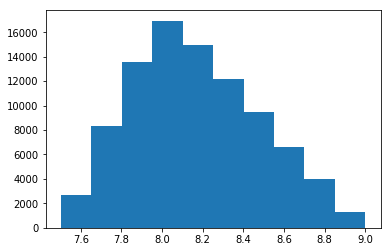

El tiempo promedio por tonelada es de: 8.165032740608487
Con una confianza de 0.95 la media estará en el intervalo normal,
 (8.163006838819614, 8.16705864239736)


In [111]:
plt.hist(Ton)
plt.show()

print("El tiempo promedio por tonelada es de:", mean_ton)
i2 = st.norm.interval(confianza, loc=np.mean(Ton), scale=st.sem(Ton))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))


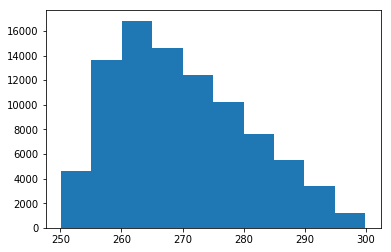

El costo promedio de este nodo por tonelada es de : 269.96108004018805
Con una confianza de 0.95 la media estará en el intervalo normal,
 (269.89050252903144, 270.03165755134467)


In [112]:
plt.hist(Cost)
plt.show()

print("El costo promedio de este nodo por tonelada es de :" , mean_cos)

i2 = st.norm.interval(confianza, loc=np.mean(Cost), scale=st.sem(Cost))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))

In [113]:
print("Teniendo en cuenta que son 1500 toneladas por semestre, el costo promedio total de todo el proceso es de: ", np.mean(cost_total), "en un aproximado de", pordia_ton, "días")

i2 = st.norm.interval(confianza, loc=np.mean(cost_total), scale=st.sem(cost_total))
print('Con una confianza de %2.2f la media del costo del proceso estará en el intervalo normal,\n %s' %(confianza,i2))

Teniendo en cuenta que son 1500 toneladas por semestre, el costo promedio total de todo el proceso es de:  44993.73383905106 en un aproximado de 73.48529466547637 días
Con una confianza de 0.95 la media del costo del proceso estará en el intervalo normal,
 (44977.48565621814, 45009.98202188399)


### Nodo 3 


In [125]:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    if freq == None:
        freq = 'd'
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

####### Calculation of log-returns
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()


In [128]:
closes = get_closes(["C=F"],"2017-10-11","2018-10-11","d")
corn= closes.loc[:,'C=F']
datos=pd.DataFrame(np.isfinite(corn))
corn.plot(figsize=(8,6))

RemoteDataError: No data fetched for symbol C=F using YahooDailyReader

In [127]:
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    #Estimamos parametros
    for distribution in DISTRIBUTIONS:

        # aplicamos la funcion fit a los datos
        try:
            
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                params = distribution.fit(data)

                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                
                # Verificamos si le queda mejor la distribucion a los datos
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)
best_fit_distribution(datos)

('beta',
 (161.57815335135516,
  0.3441343092268094,
  -10.677571700953399,
  11.6775717009534))

In [116]:
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web 
import warnings
import numpy as np
#%% obtencion de datos





#%%


matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = datos

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Daily returns\n All Fitted Distributions')
ax.set_xlabel(u'%')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Daily returns with best fit distribution \n' + dist_str)
ax.set_xlabel(u'%')
ax.set_ylabel('Frequency')

TypeError: Empty 'DataFrame': no numeric data to plot

<Figure size 864x576 with 0 Axes>

In [84]:
def get_historical_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]



In [99]:
file= 'USD_MXN.xlsx'
data = pd.read_excel(file )
data= data.iloc[0:, 1]
data
S_0= data[0]
mu_r = data.mean()
sigma_r = data.std()


In [102]:
def BSprices(mu,sigma,S0,NbTraj,NbStep):
    T = 1/252
    nu = mu-(sigma**2)/2
    
    DeltaT = T/NbStep
    SqDeltaT = np.sqrt(DeltaT)
    
    #for i in range(NbStep):
    DeltaW = SqDeltaT*np.random.randn(NbTraj, NbStep-1)
    increments = nu*DeltaT + sigma*DeltaW
    concat = np.concatenate((np.log(S0)*np.ones([NbTraj,1]),increments),axis=1)
    LogSt = np.cumsum(concat,axis=1)
    St = np.exp(LogSt)
    t = np.arange(0,1,DeltaT)

    return St.T,t 


NbTraj = 5000
NbStep = 42
mu = np.mean(precios)
sigma= np.std(precios)

St,t = BSprices(mu,sigma,S_0,NbTraj,NbStep)

price= pd.DataFrame(St)
enero= price.iloc[41,0:]
price_mean=(np.mean(enero))
price_mean
print("El precio promedio del dolar sera de: ", price_mean)

El precio promedio del dolar sera de:  21.701188945185763


#### NODO 4

In [20]:
confianza=.95
Ton_hectarea=np.random.triangular(14.6,14.8,15,1000)
i2 = st.norm.interval(confianza, loc=np.mean(Ton_hectarea), scale=st.sem(Ton_hectarea))
print('Con una confianza de  %2.2f la media de Toneladas producidas por Hectarea estará en el intervalo normal,\n %s' %(confianza,i2))
Ton_Hc_mean= np.mean(Ton_hectarea)
costo_ton= np.mean(c_proc)/np.mean(Ton_hectarea)
Costo_total= mean_cos+costo_ton
print("El costo promedio de una Tonelada ya lista para la venta es de ", Costo_total)

#ganancia= Precio- Costo_total 
#print("La ganancia total por la venta de las 1500 toneladas es de ", ganancia)


Con una confianza de  0.95 la media de Toneladas producidas por Hectarea estará en el intervalo normal,
 (14.794433773129814, 14.804610197382143)
El costo promedio de una Tonelada ya lista para la venta es de  1712.3193845330495


<script src="webfont.js"></script>
<script src="snap.svg-min.js"></script>
<script src="underscore-min.js"></script>
<script src="sequence-diagram-min.js"></script>

<div id="diagram"></div>
<script>
  var diagram = Diagram.parse("A->B: Message");
  diagram.drawSVG("diagram", {theme: 'hand'});
</script>


### 1.6 Conclusiones.

